In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('breast-cancer.csv')
df.head()

Saving breast-cancer.csv to breast-cancer (4).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
#Cleaning data
print("Missing values:", df.isnull().sum())
df = df.dropna()

Missing values: id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [49]:
#Encode target variable
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # 'M'->1, 'B'->0

#Define features and target
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

#Outlier removal using IQR method(essential for SVMs)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X = X[mask]
y = y[mask]

#Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
#Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

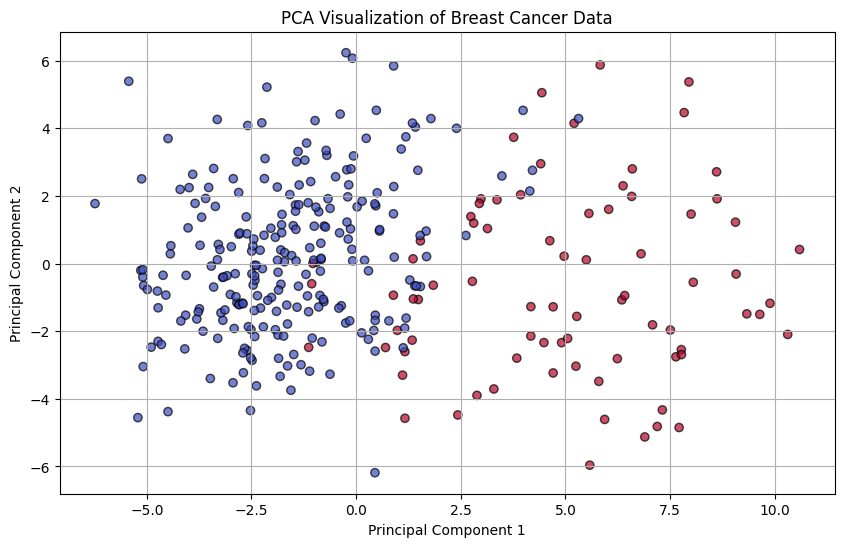

In [56]:
#PCA scatter plot (train data)
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title('PCA Visualization of Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Principle componet 1(PC1) : The direction(line) that captrures the maximum variance in the data.

Principle componet 2(PC2) : Orthogonal to PC1, captures the next most variance

In [51]:
#Train SVM models
#Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_pca, y_train)
y_pred_linear = svm_linear.predict(X_test_pca)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))

Linear Kernel Accuracy: 0.9375
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.86      0.90      0.88        20

    accuracy                           0.94        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80



In [52]:
#RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_pca, y_train)
y_pred_rbf = svm_rbf.predict(X_test_pca)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

RBF Kernel Accuracy: 0.9375
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.86      0.90      0.88        20

    accuracy                           0.94        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80



In [53]:
#Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train_pca, y_train)
y_pred_poly = svm_poly.predict(X_test_pca)

print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Classification Report:")
print(classification_report(y_test, y_pred_poly))

Polynomial Kernel Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.70      0.82        20

    accuracy                           0.93        80
   macro avg       0.95      0.85      0.89        80
weighted avg       0.93      0.93      0.92        80



In [54]:
#Evaluation function
def evaluate_model(name, y_test, y_pred):
    print(f"{name} SVM")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Evaluate models
evaluate_model("Linear", y_test, y_pred_linear)
evaluate_model("RBF", y_test, y_pred_rbf)
evaluate_model("Polynomial", y_test, y_pred_poly)

Linear SVM
Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.86      0.90      0.88        20

    accuracy                           0.94        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
 [[57  3]
 [ 2 18]]
RBF SVM
Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.86      0.90      0.88        20

    accuracy                           0.94        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
 [[57  3]
 [ 2 18]]
Polynomial SVM
Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
     

Effect of Kernels (SVM on Breast Cancer Data)
We trained SVM models with three different kernels:

1. Linear Kernel :

Accuracy: 93.75%
Performs well, especially for class 0(Benign).
Works effectively since the data is mostly linearly separable (as seen in PCA plot).

2. RBF Kernel :

Accuracy: 93.75% (same as linear)
Captures non-linear patterns, but no major improvement.
It shows that linear separation was already sufficient.

3. Polynomial Kernel :

Accuracy: 92.5%
Perfect precision for class 1(Malignant), but lower recall.
Likely overfitted to class 0(Benign), leading to missed malignant cases.

Conclusion:

Linear kernel is the best choice here. It is simple, fast, and just as accurate.

RBF gives similar results.

Polynomial kernel is less balanced, with signs of overfitting.